# Modules

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Dataset Input Checks

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input/hair-diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hair-diseases/test/folliculitis-decalvans/folliculitis-decalvans-1.jpg
/kaggle/input/hair-diseases/test/folliculitis-decalvans/folliculitis-decalvans-3.jpg
/kaggle/input/hair-diseases/test/folliculitis-decalvans/folliculitis-decalvans-15.jpg
/kaggle/input/hair-diseases/test/dissecting-cellulitis/dissecting-cellulitis-3.jpg
/kaggle/input/hair-diseases/test/dissecting-cellulitis/dissecting-cellulitis-9.jpg
/kaggle/input/hair-diseases/test/dissecting-cellulitis/dissecting-cellulitis-11.jpg
/kaggle/input/hair-diseases/test/telogen-effluvium/telogen-effluvium-4.jpg
/kaggle/input/hair-diseases/test/telogen-effluvium/telogen-effluvium-6.jpg
/kaggle/input/hair-diseases/test/telogen-effluvium/telogen-effluvium-5.jpg
/kaggle/input/hair-diseases/test/discoid-lupus/discoid-lupus-2.jpg
/kaggle/input/hair-diseases/test/alopecia-areata/alopecia-areata-3.jpg
/kaggle/input/hair-diseases/test/alopecia-areata/alopecia-areata-22.jpg
/kaggle/input/hair-diseases/test/alopecia-areata/alopecia-a

# Dataset Paths

In [4]:
train_dir = "/kaggle/input/hair-diseases/train"
test_dir = "/kaggle/input/hair-diseases/test"

# Load Images and process

In [5]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=(299, 299),
                                           batch_size=32,
                                           class_mode='categorical')

test_data = test_gen.flow_from_directory(test_dir,
                                         target_size=(299, 299),
                                         batch_size=32,
                                         class_mode='categorical')


Found 211 images belonging to 14 classes.
Found 59 images belonging to 14 classes.


# Pre-trained Xception Model

In [7]:
from tensorflow.keras.applications import Xception


base_model = Xception(weights=None, include_top=False, input_shape=(299, 299, 3))


base_model.load_weights("/kaggle/input/xception_weights_tf_dim_ordering_tf_kernels_notop/tensorflow2/default/1/xception_weights_tf_dim_ordering_tf_kernels_notop.h5")

#  Add Custom Layers on Top

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)         
x = Dense(1024, activation='relu')(x)    
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the Pretrained Layers

In [9]:
for layer in base_model.layers:
    layer.trainable = False

# Compile the Model

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [16]:
history = model.fit(train_data,
                    epochs=30,
                    validation_data=test_data)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 0.9741 - loss: 0.0857 - val_accuracy: 0.7288 - val_loss: 1.4374
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 62s 9s/step - accuracy: 0.9619 - loss: 0.1075 - val_accuracy: 0.7458 - val_loss: 1.1652
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 55s 8s/step - accuracy: 0.9823 - loss: 0.0663 - val_accuracy: 0.7288 - val_loss: 1.5640
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 63s 9s/step - accuracy: 0.9807 - loss: 0.0836 - val_accuracy: 0.7288 - val_loss: 1.2761
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 0.9793 - loss: 0.0539 - val_accuracy: 0.7288 - val_loss: 1.4366
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 0.9716 - loss: 0.0783 - val_accuracy: 0.7627 - val_loss: 1.1639
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 63s 9s/step - accuracy: 0.9827 - loss: 0.0579 - val_accuracy: 0.7458 - val_loss: 1.2884
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 0.9976 - loss: 0.0489 - val_accuracy: 0.7288 - val_loss: 1.3709
Epoch 9/

# Evaluate the Model

In [17]:
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.7463 - loss: 1.1636
Test Accuracy: 72.88%


In [18]:
loss, acc = model.evaluate(train_data)
print(f"Train Accuracy: {acc*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.9877 - loss: 0.0464
Train Accuracy: 98.58%


# Plotting

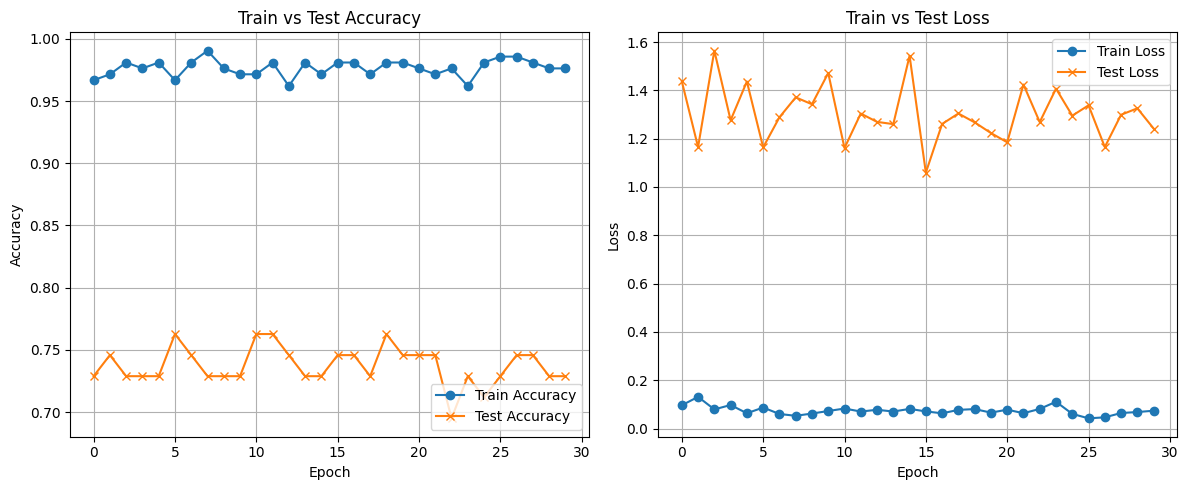

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Test Accuracy', marker='x')
plt.legend(loc='lower right')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Test Loss', marker='x')
plt.legend(loc='upper right')
plt.title('Train vs Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Show Model Predictions on Test Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


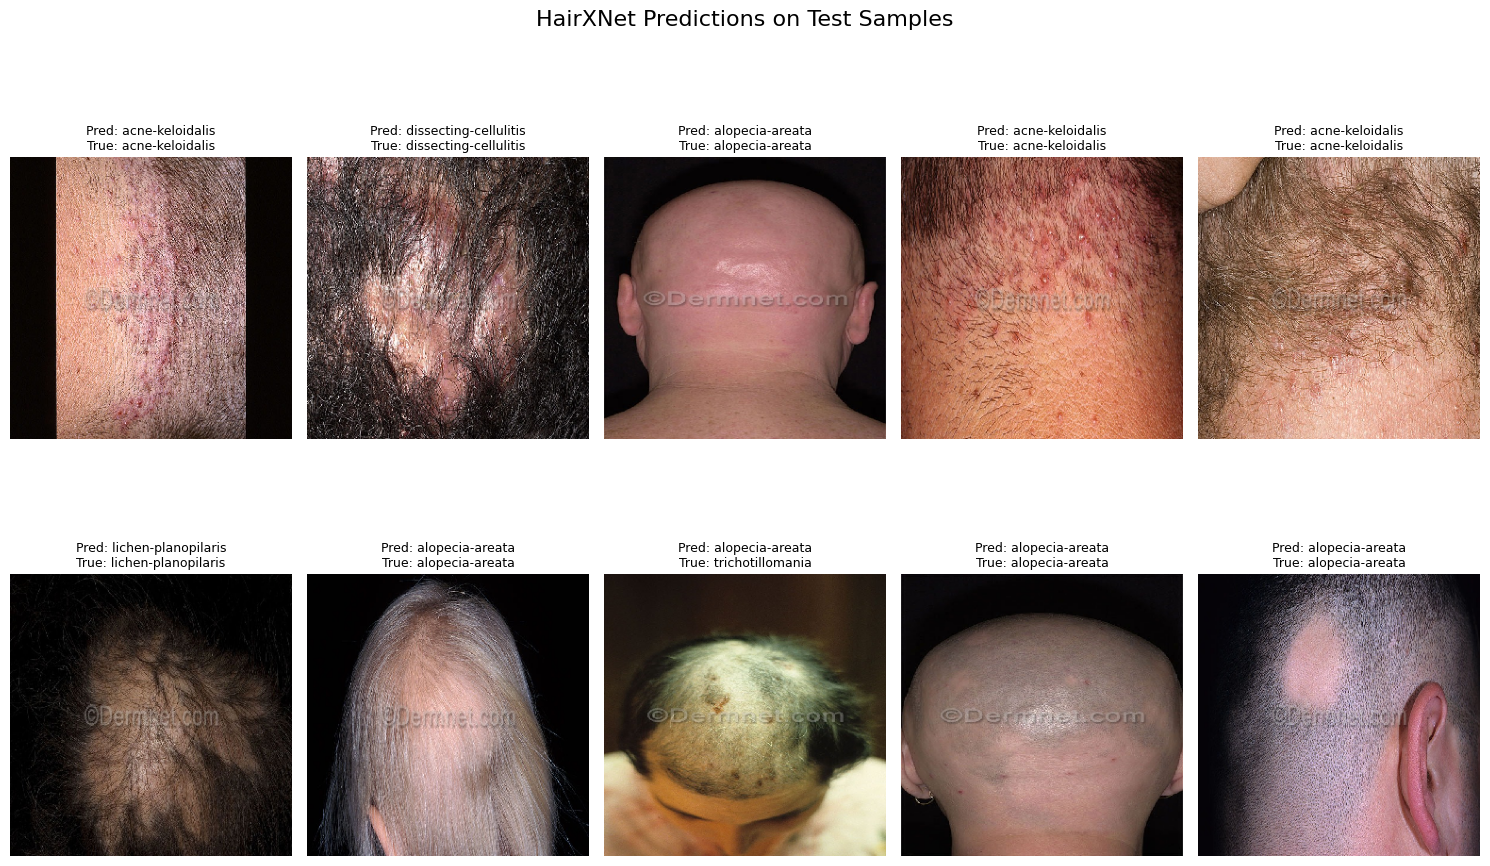

In [20]:
# Get class indices and reverse map
class_indices = train_data.class_indices
labels = list(class_indices.keys())  # ['acne-keloidalis', 'alopecia-areata', ...]

# Predict on test data
test_images, test_labels = next(test_data)  # gets a batch from the test set
predictions = model.predict(test_images)

# Get predicted class index and label
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Show 10 sample predictions
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(f"Pred: {labels[predicted_classes[i]]}\nTrue: {labels[true_classes[i]]}", fontsize=9)

plt.suptitle("HairXNet Predictions on Test Samples", fontsize=16)
plt.tight_layout()
plt.show()